# House Price Prediction Using Linear Regression

## Importing Libraries

In [40]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler

## Load the Dataset

In [41]:
train_df = pd.read_csv("../data/raw/train.csv")
test_df = pd.read_csv("../data/raw/test.csv")

In [42]:
train_df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [43]:
train_df.shape

(1460, 81)

In [44]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [45]:
train_df.describe().T

,count,mean,std,min,25%,50%,75%,max
Id,1460.0,730.500000,421.610009,1.0,365.75,730.5,1095.25,1460.0
MSSubClass,1460.0,56.897260,42.300571,20.0,20.00,50.0,70.00,190.0
LotFrontage,1201.0,70.049958,24.284752,21.0,59.00,69.0,80.00,313.0
LotArea,1460.0,10516.828082,9981.264932,1300.0,7553.50,9478.5,11601.50,215245.0
OverallQual,1460.0,6.099315,1.382997,1.0,5.00,6.0,7.00,10.0
OverallCond,1460.0,5.575342,1.112799,1.0,5.00,5.0,6.00,9.0
YearBuilt,1460.0,1971.267808,30.202904,1872.0,1954.00,1973.0,2000.00,2010.0
YearRemodAdd,1460.0,1984.865753,20.645407,1950.0,1967.00,1994.0,2004.00,2010.0
MasVnrArea,1452.0,103.685262,181.066207,0.0,0.00,0.0,166.00,1600.0
BsmtFinSF1,1460.0,443.639726,456.098091,0.0,0.00,383.5,712.25,5644.0


In [46]:
test_df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [47]:
test_df.shape

(1459, 80)

In [48]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1459 non-null   int64  
 1   MSSubClass     1459 non-null   int64  
 2   MSZoning       1455 non-null   object 
 3   LotFrontage    1232 non-null   float64
 4   LotArea        1459 non-null   int64  
 5   Street         1459 non-null   object 
 6   Alley          107 non-null    object 
 7   LotShape       1459 non-null   object 
 8   LandContour    1459 non-null   object 
 9   Utilities      1457 non-null   object 
 10  LotConfig      1459 non-null   object 
 11  LandSlope      1459 non-null   object 
 12  Neighborhood   1459 non-null   object 
 13  Condition1     1459 non-null   object 
 14  Condition2     1459 non-null   object 
 15  BldgType       1459 non-null   object 
 16  HouseStyle     1459 non-null   object 
 17  OverallQual    1459 non-null   int64  
 18  OverallC

In [49]:
test_df.describe().T

,count,mean,std,min,25%,50%,75%,max
Id,1459.0,2190.000000,421.321334,1461.0,1825.50,2190.0,2554.50,2919.0
MSSubClass,1459.0,57.378341,42.746880,20.0,20.00,50.0,70.00,190.0
LotFrontage,1232.0,68.580357,22.376841,21.0,58.00,67.0,80.00,200.0
LotArea,1459.0,9819.161069,4955.517327,1470.0,7391.00,9399.0,11517.50,56600.0
OverallQual,1459.0,6.078821,1.436812,1.0,5.00,6.0,7.00,10.0
OverallCond,1459.0,5.553804,1.113740,1.0,5.00,5.0,6.00,9.0
YearBuilt,1459.0,1971.357779,30.390071,1879.0,1953.00,1973.0,2001.00,2010.0
YearRemodAdd,1459.0,1983.662783,21.130467,1950.0,1963.00,1992.0,2004.00,2010.0
MasVnrArea,1444.0,100.709141,177.625900,0.0,0.00,0.0,164.00,1290.0
BsmtFinSF1,1458.0,439.203704,455.268042,0.0,0.00,350.5,753.50,4010.0


## Preprocessing

In [50]:
# Selecting features for feature emgineering
features = ['GrLivArea', 'BedroomAbvGr', 'FullBath', 'OverallQual', 'YearBuilt', 'GarageArea'] 

# Separating features and target variable
X_train = train_df[features] # features
y_train = train_df['SalePrice'] # target

X_test = test_df[features] # for test data feature selection 

# Checking missing values

missing_values = X_train.isnull().sum()
missing_values[missing_values > 0]

# Handling missing values
X_train.fillna(X_train.mean(), inplace = True)
X_test.fillna(X_test.mean(), inplace = True)

# Feature Scaling because we are using regularization
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)

C:\Users\yared\AppData\Local\Temp\ipykernel_8092\1619209165.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.fillna(X_train.mean(), inplace = True)
C:\Users\yared\AppData\Local\Temp\ipykernel_8092\1619209165.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.fillna(X_test.mean(), inplace = True)


## Training the Data using Linear Regression Model

In [51]:
# Initialize and train the linear regression model
linear_model = LinearRegression()
linear_model.fit(X_train_scaled, y_train)

# Making predictions and Evatuating the model on the training data
y_pred_train = linear_model.predict(X_train_scaled)

# Calculating Root Mean Squared Error
train_rmse = np.sqrt(mean_squared_error(y_train, y_pred_train))

print(f"Linear Regression RMSE (Training Data): {train_rmse}")

Linear Regression RMSE (Training Data): 39010.982203016916


## Model Tuning and Cross-Validation with Ridge and Lasso Regression

In [52]:
from sklearn.linear_model import Ridge, Lasso
from sklearn.model_selection import cross_val_score

# Hyperparameters for Linear Regression
linear_model = LinearRegression()
linear_model.fit(X_train_scaled, y_train)
linear_scores = cross_val_score(linear_model, X_train_scaled, y_train, cv=5, scoring='neg_mean_squared_error')
linear_cv_rmse = np.sqrt(-linear_scores.mean())

print(f"Linear Regression RMSE (Cross-Validation): {linear_cv_rmse}")

# Hyperparameters for Ridge Regression
ridge_model = Ridge(alpha=1.0)
ridge_model.fit(X_train_scaled, y_train)
ridge_scores = cross_val_score(ridge_model, X_train_scaled, y_train, cv=5, scoring='neg_mean_squared_error')
ridge_cv_rmse = np.sqrt(-ridge_scores.mean())

print(f"Ridge Regression RMSE (Cross-Validation): {ridge_cv_rmse}")

# Hyperparameters for Lasso Regression
lasso_model = Lasso(alpha=0.1)
lasso_model.fit(X_train_scaled, y_train)
lasso_scores = cross_val_score(lasso_model, X_train_scaled, y_train, cv=5, scoring='neg_mean_squared_error')
lasso_cv_rmse = np.sqrt(-lasso_scores.mean())

print(f"Lasso Regression RMSE (Cross-Validation): {lasso_cv_rmse}")

Linear Regression RMSE (Cross-Validation): 39528.78803288624
Ridge Regression RMSE (Cross-Validation): 39526.85385485418
Lasso Regression RMSE (Cross-Validation): 39528.78417950614


## Comparing the RMSE for each model

In [53]:
# Print RMSE for comparison
print(f"Linear Regression CV RMSE: {linear_cv_rmse}")
print(f"Ridge Regression CV RMSE: {ridge_cv_rmse}")
print(f"Lasso Regression CV RMSE: {lasso_cv_rmse}")

Linear Regression CV RMSE: 39528.78803288624
Ridge Regression CV RMSE: 39526.85385485418
Lasso Regression CV RMSE: 39528.78417950614


## Visualizing the relationship between actual and predicted prices

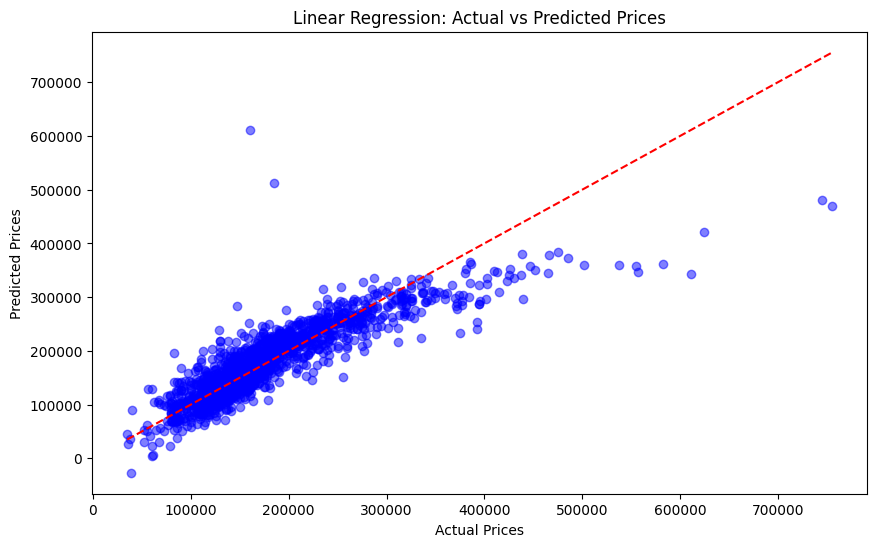

In [54]:
# Visualizing the relationship between actual and predicted prices
y_pred_linear = linear_model.predict(X_train_scaled)

plt.figure(figsize=(10, 6))
plt.scatter(y_train, y_pred_linear, color='blue', alpha=0.5)
plt.plot([min(y_train), max(y_train)], [min(y_train), max(y_train)], color='red', linestyle='--')
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Linear Regression: Actual vs Predicted Prices')
plt.show()

## Model Comparison

In [56]:
# The less the Root Mean Squared Error (RMSE), The better the model is.

Models = ['Linear Regression','Ridge Regression','Lasso Regression']
RMSE = [linear_cv_rmse, ridge_cv_rmse, lasso_cv_rmse]
comparison_df = pd.DataFrame({'Model': Models, 'RMSE': RMSE})
comparison_df.sort_values(by='RMSE', ascending=True)

comparison_df

,Model,RMSE
0,Linear Regression,39528.788033
1,Ridge Regression,39526.853855
2,Lasso Regression,39528.784180


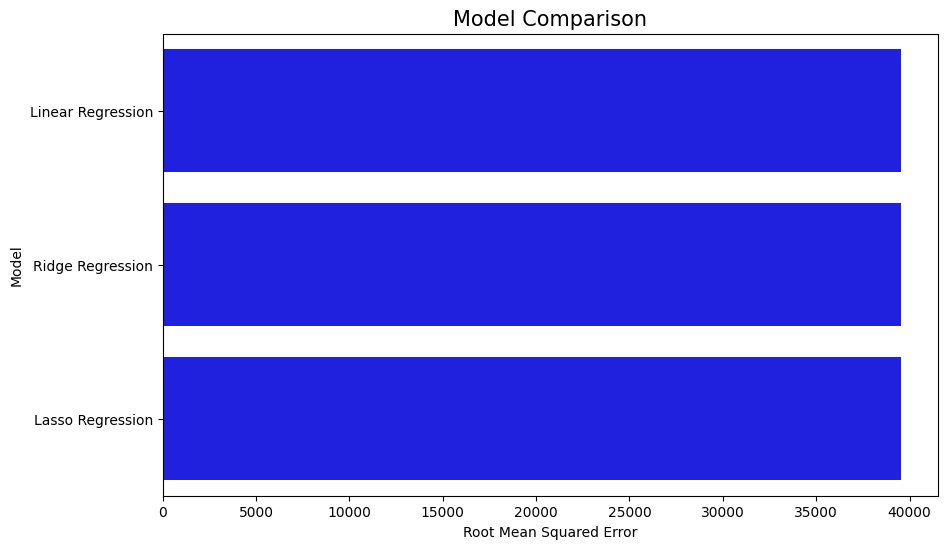

In [58]:
# Visualizing the model comparison

plt.figure(figsize=(10, 6))
sns.barplot(x='RMSE', y='Model', data=comparison_df, color='blue')
plt.xlabel('Root Mean Squared Error')
plt.ylabel('Model')
plt.title('Model Comparison', size=15)
plt.show()